<a href="https://colab.research.google.com/github/NandanaSasidharan908/SCT_DS_1/blob/main/skillcraft_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


In [ ]:
df = pd.read_csv("ChanDarren_RaiTaran_Lab2a.csv")

print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

Shape of dataset: (891, 12)

First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# 2. Missing values check
print("\nMissing values before cleaning:")
print(df.isnull().sum())



Missing values before cleaning:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# 3. Data Cleaning
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  # Fill Embarked with mode
df['Age'] = df['Age'].fillna(df['Age'].median())                  # Fill Age with median
df['Cabin'] = df['Cabin'].fillna('Unknown')                       # Fill Cabin missing with 'Unknown'

In [ ]:
# Extract title from Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Group rare titles
rare_titles = df['Title'].value_counts()[df['Title'].value_counts() < 10].index
df['Title'] = df['Title'].replace(rare_titles, 'Rare')

# Family size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 80],
                        labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior'])

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-265743438.py:2: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


/tmp/ipython-input-2248902229.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='pastel')


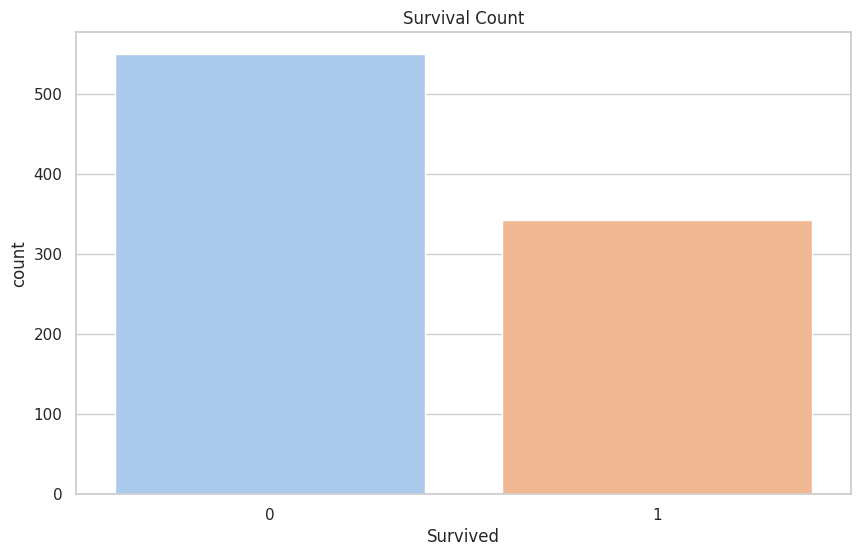

/tmp/ipython-input-2248902229.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, palette='pastel')


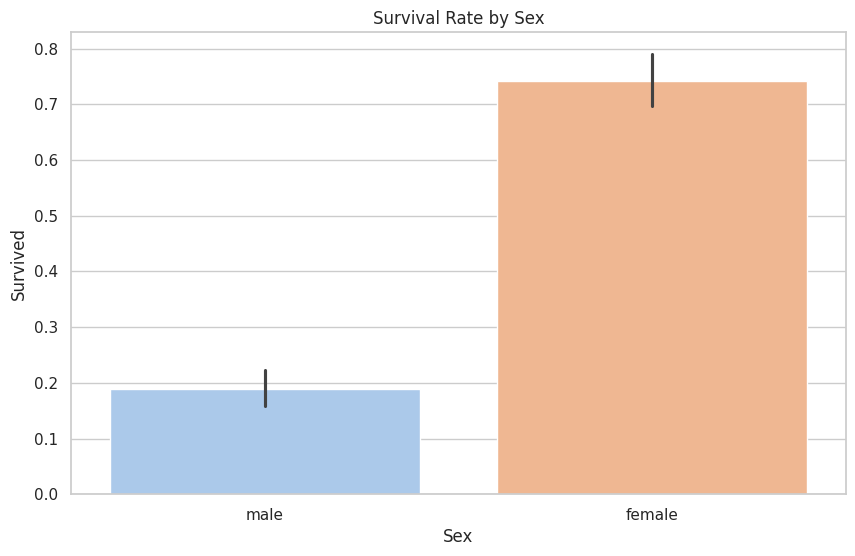

/tmp/ipython-input-2248902229.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, palette='pastel')


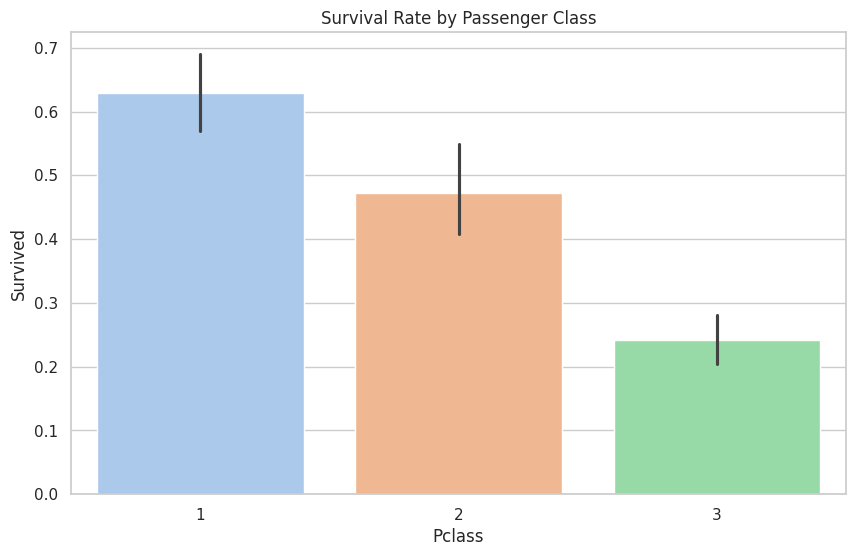

/tmp/ipython-input-2248902229.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='Survived', data=df, palette='pastel')


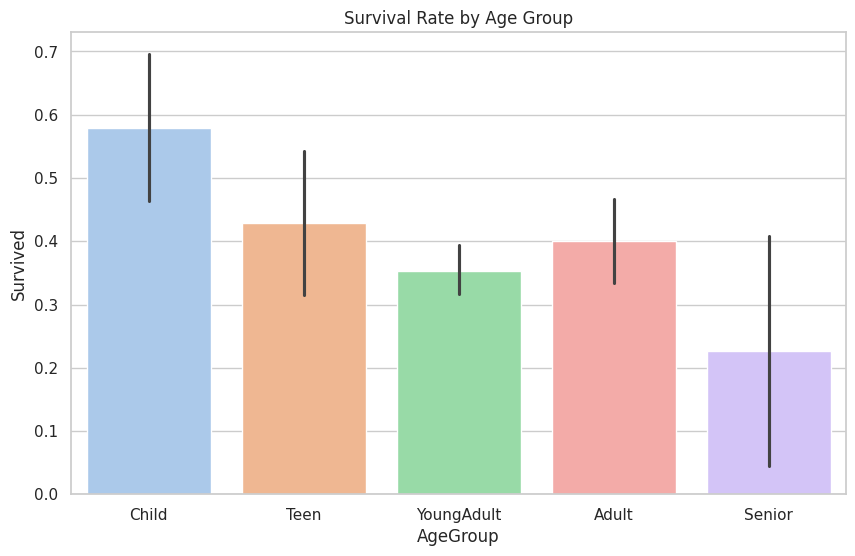

/tmp/ipython-input-2248902229.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=df, palette='pastel')


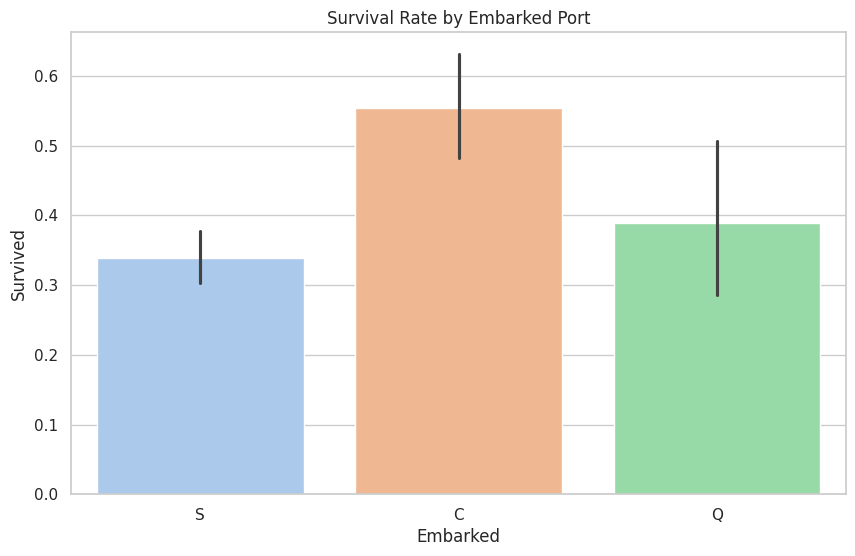

/tmp/ipython-input-2248902229.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Fare', data=df, palette='pastel')


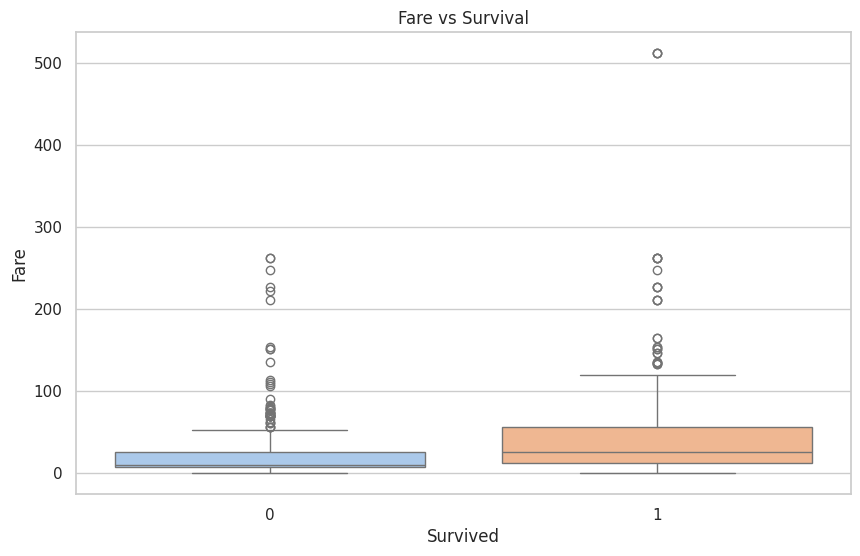

/tmp/ipython-input-2248902229.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FamilySize', y='Survived', data=df, palette='pastel')


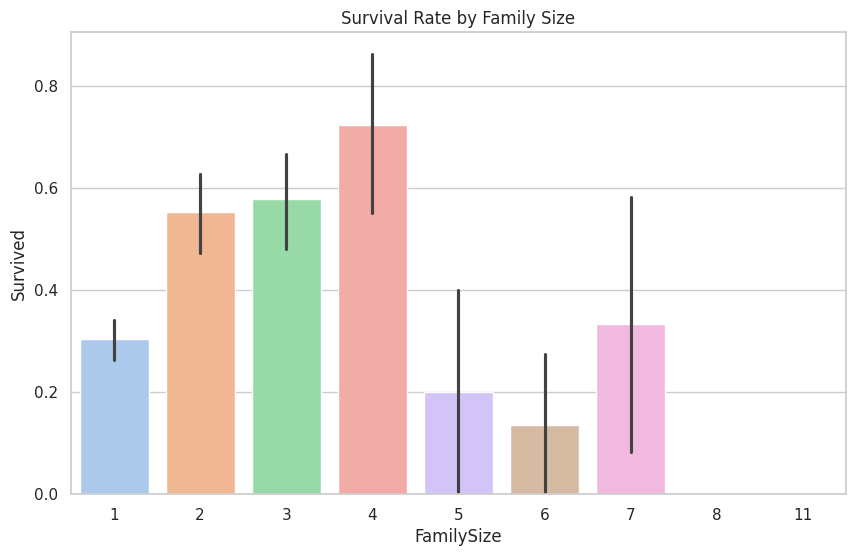

In [ ]:
# Survival count
sns.countplot(x='Survived', data=df, palette='pastel')
plt.title("Survival Count")
plt.show()

# Survival by Sex
sns.barplot(x='Sex', y='Survived', data=df, palette='pastel')
plt.title("Survival Rate by Sex")
plt.show()

# Survival by Pclass
sns.barplot(x='Pclass', y='Survived', data=df, palette='pastel')
plt.title("Survival Rate by Passenger Class")
plt.show()

# Survival by Age group
sns.barplot(x='AgeGroup', y='Survived', data=df, palette='pastel')
plt.title("Survival Rate by Age Group")
plt.show()

# Survival by Embarked
sns.barplot(x='Embarked', y='Survived', data=df, palette='pastel')
plt.title("Survival Rate by Embarked Port")
plt.show()

# Fare vs Survival
sns.boxplot(x='Survived', y='Fare', data=df, palette='pastel')
plt.title("Fare vs Survival")
plt.show()

# Family size vs Survival
sns.barplot(x='FamilySize', y='Survived', data=df, palette='pastel')
plt.title("Survival Rate by Family Size")
plt.show()

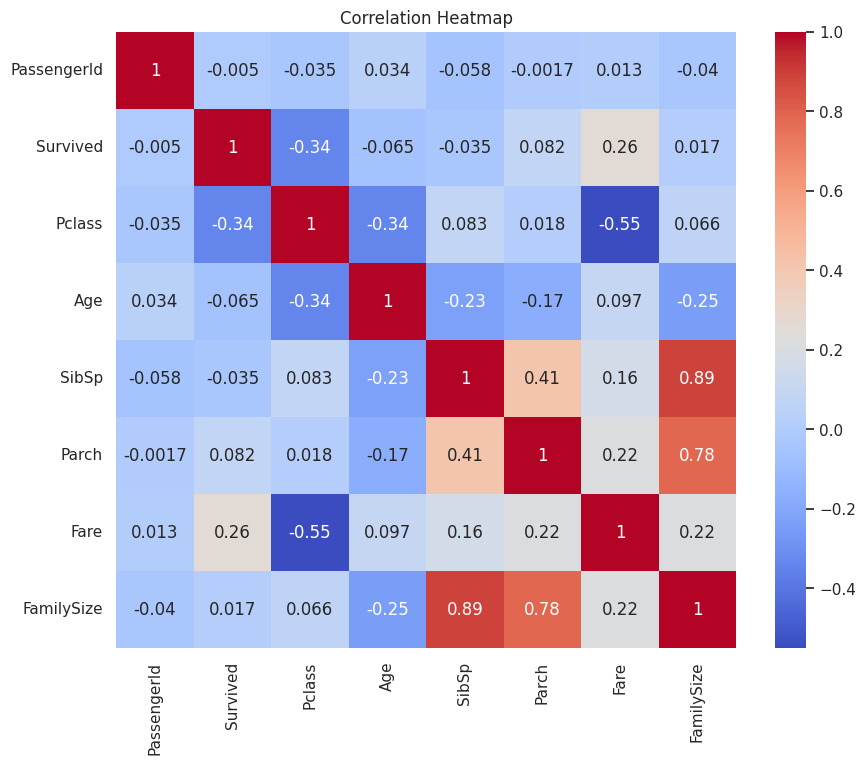

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# 7. Summary of patterns
print("\n--- Patterns & Trends Identified ---")
print("1. Females survived at a much higher rate than males.")
print("2. Higher passenger class had higher survival rates.")
print("3. Children had better survival chances than adults.")
print("4. Higher fares were associated with better survival chances.")
print("5. Passengers from Cherbourg had higher survival rates.")
print("6. Very large families and passengers travelling alone had lower survival rates.")



--- Patterns & Trends Identified ---
1. Females survived at a much higher rate than males.
2. Higher passenger class had higher survival rates.
3. Children had better survival chances than adults.
4. Higher fares were associated with better survival chances.
5. Passengers from Cherbourg had higher survival rates.
6. Very large families and passengers travelling alone had lower survival rates.
